In [90]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.model_selection import cross_val_score
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

evaluation = pd.DataFrame({'Model': [],
                           'Details':[],
                           'Root Mean Squared Error (RMSE)':[],
                           'R-squared (training)':[],
                           'Adjusted R-squared (training)':[],
                           'R-squared (test)':[],
                           'Adjusted R-squared (test)':[],
                           '5-Fold Cross Validation':[]})

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.base import TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures

In [2]:
pwd = os.getcwd()

In [3]:
df = pd.read_csv(pwd + '\\car data v3.csv')

In [4]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [5]:
df['selling_price'].describe()

count    8.128000e+03
mean     6.382718e+05
std      8.062534e+05
min      2.999900e+04
25%      2.549990e+05
50%      4.500000e+05
75%      6.750000e+05
max      1.000000e+07
Name: selling_price, dtype: float64

In [6]:
target = 'selling_price'

In [7]:
price_below_four = df[df.selling_price < 1500000]

<AxesSubplot:xlabel='selling_price', ylabel='Count'>

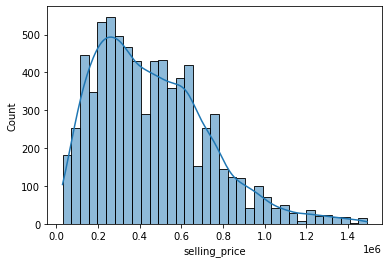

In [8]:
sns.histplot(data=price_below_four, x=target, kde=True,bins=35)

The vehicles above 600000 aren't favoured as much as the one below that number

In [9]:
def get_vehicle_model(x):
    return x.split()[0]

In [10]:
df['vehicle_model'] = df['name'].apply(lambda x: get_vehicle_model(x))

Text(0, 0.5, 'Count of vehicle model')

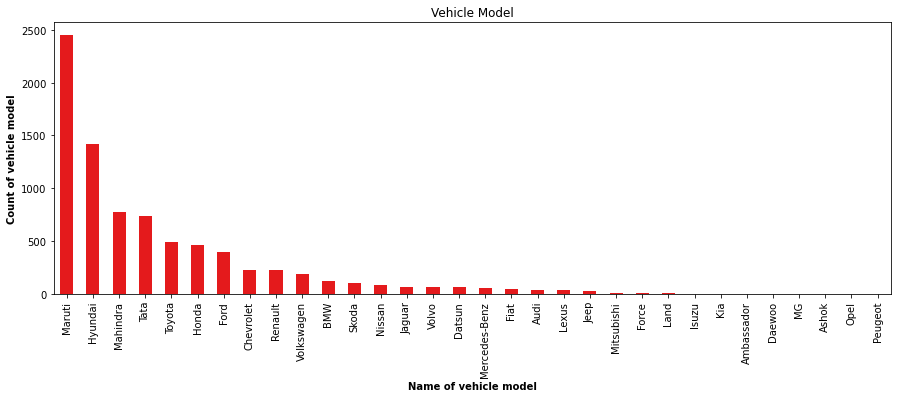

In [11]:
plt.figure(figsize=(15,5))
ax=df['vehicle_model'].value_counts().plot(kind='bar', stacked=True, colormap='Set1')
ax.title.set_text('Vehicle Model')
plt.xlabel('Name of vehicle model', fontweight='bold')
plt.ylabel("Count of vehicle model", fontweight='bold')

- Maruti is the most favoured vehicle model
- Isuzu, Kia, Ambassador, Daewoo, MG, Ashok, Opel, Peugeot are the least favoured vehicle models

In [12]:
df.columns
numeric_features = ['year', 'selling_price', 'km_driven', 'seats']

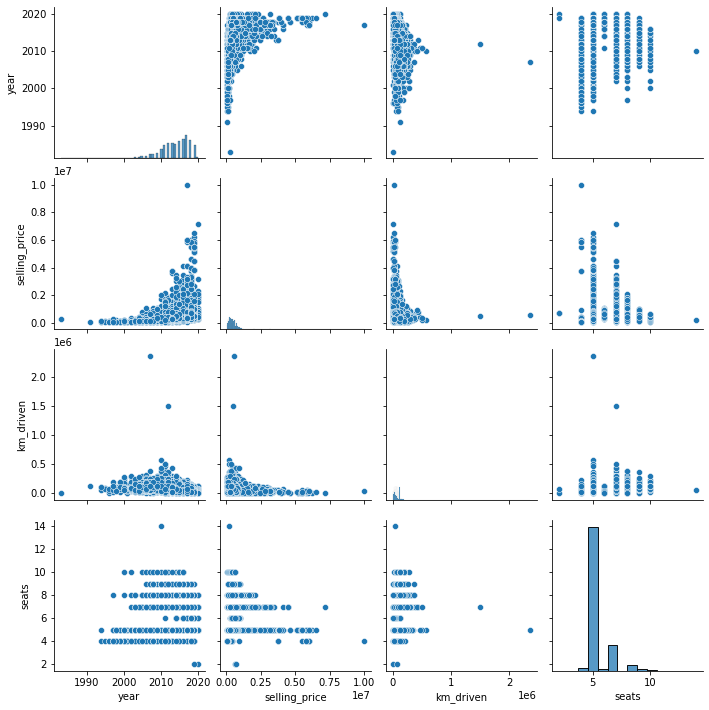

In [13]:
sns.pairplot(df[numeric_features])

- 'year' has a strong colleration with selling price

In [14]:
other_features = ['fuel', 'seller_type','transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque']

<AxesSubplot:xlabel='selling_price', ylabel='seller_type'>

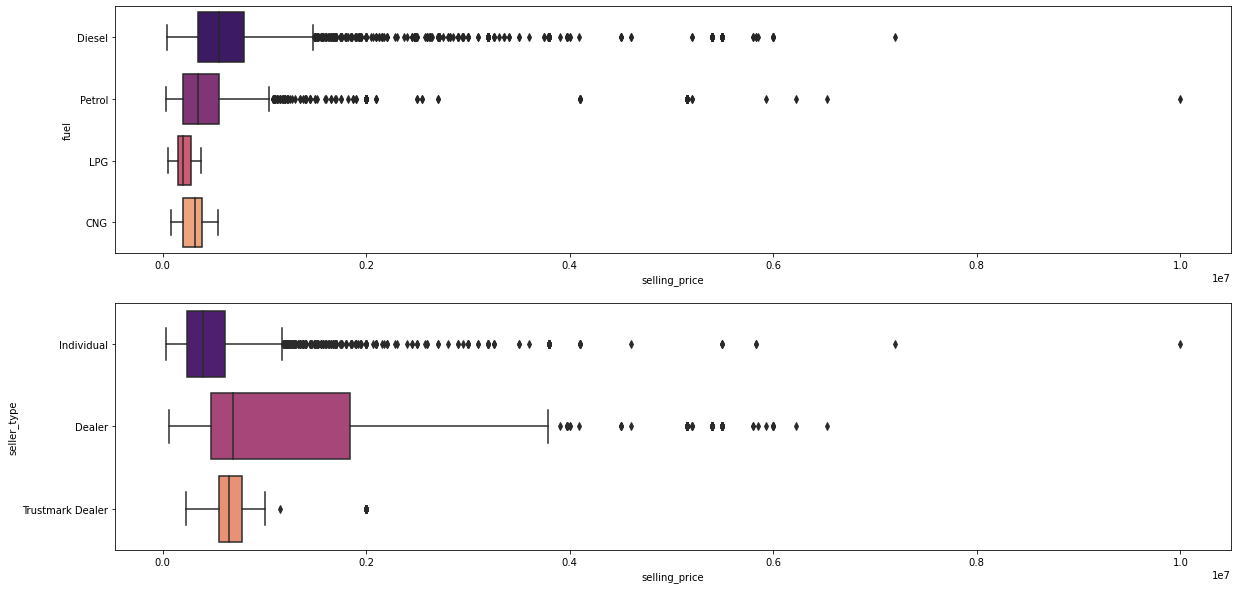

In [15]:
plt.figure(figsize=(20,10))
plt.subplot(2, 1, 1)
sns.boxplot(y='fuel', x=target, data=df, orient='h', palette='magma')
plt.subplot(2, 1, 2)
sns.boxplot(y='seller_type', x=target, data=df, orient='h', palette='magma')

<AxesSubplot:xlabel='selling_price', ylabel='owner'>

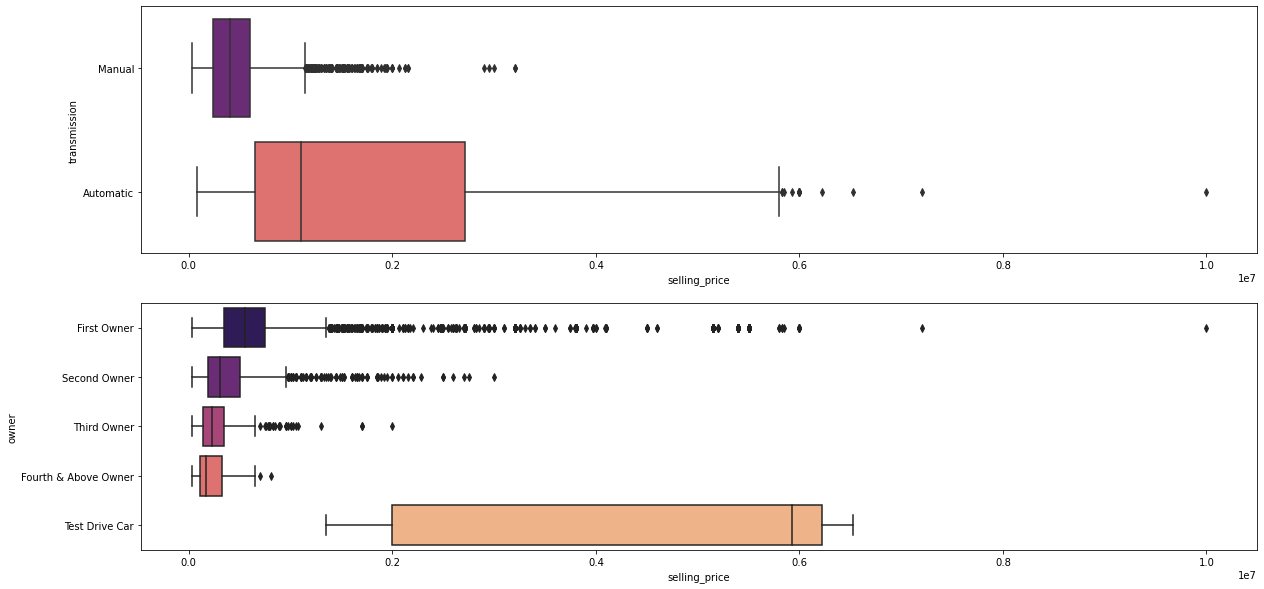

In [16]:
plt.figure(figsize=(20,10))
plt.subplot(2, 1, 1)
sns.boxplot(y='transmission', x=target, data=df, orient='h', palette='magma')
plt.subplot(2, 1, 2)
sns.boxplot(y='owner', x=target, data=df,  orient='h', palette='magma')

- Some big outliers in Diesel and Petrol vehicles, but the vehicles fueled by Diesel are mostly more expensive then those fueled by others fuels
- Buying it from a dealer is the most expensive while buying it from an individual is the cheapest
- Automatic is more expensive then manual
- Bying the vehicle from a first owner is the most expensive and as the vehicle gets passed down, its price goes down as well

[Text(0.5, 0, 'Seller Type'), Text(0, 0.5, 'Frequency of seller type')]

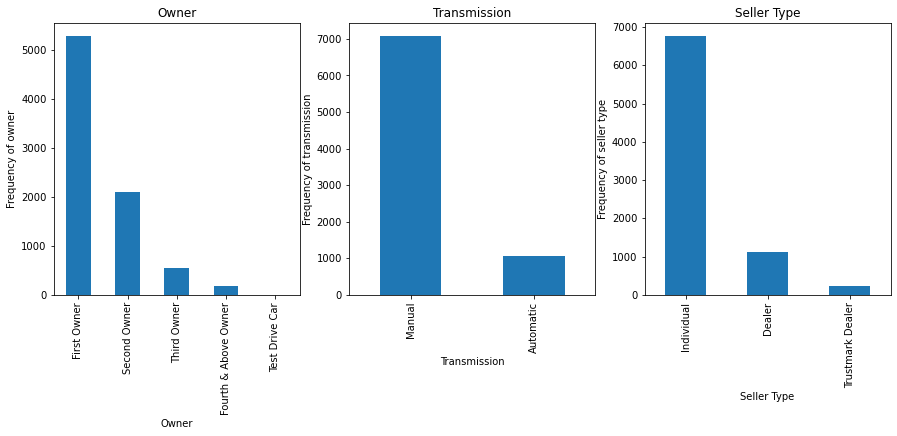

In [17]:
plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
plt1 = df['owner'].value_counts().plot(kind='bar')
plt.title('Owner')
plt1.set(xlabel='Owner', ylabel='Frequency of owner')

plt.subplot(1, 3, 2)
plt1 = df['transmission'].value_counts().plot(kind='bar')
plt.title('Transmission')
plt1.set(xlabel='Transmission', ylabel='Frequency of transmission')

plt.subplot(1, 3, 3)
plt1 = df['seller_type'].value_counts().plot(kind='bar')
plt.title('Seller Type')
plt1.set(xlabel='Seller Type', ylabel='Frequency of seller type')


[Text(0.5, 0, 'Fuel Type'), Text(0, 0.5, 'Frequency of fuel type')]

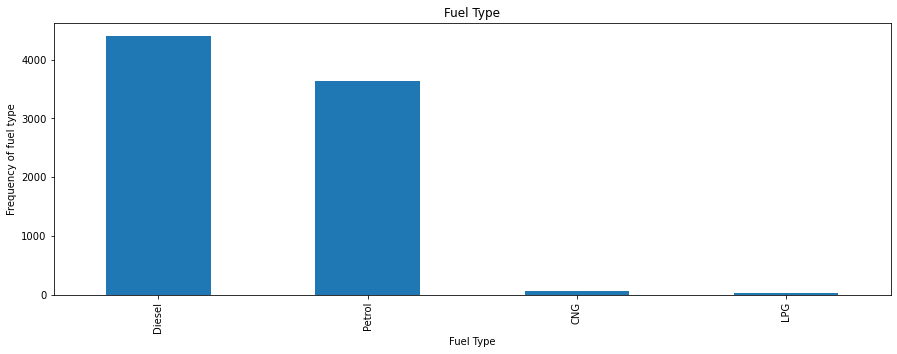

In [18]:
plt.figure(figsize=(15, 5))
plt1 = df['fuel'].value_counts().plot(kind='bar')
plt.title('Fuel Type')
plt1.set(xlabel='Fuel Type', ylabel='Frequency of fuel type')


- Vehicles are mostly first owned
- Vehicles are mostly manual
- Seller types are mostly individual
- Fuel types are mostly Diesel and Petrol

<Figure size 1440x432 with 0 Axes>

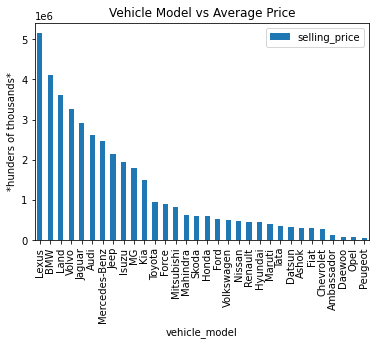

In [20]:
df_y = pd.DataFrame(df.groupby(['vehicle_model'])['selling_price'].mean().sort_values(ascending=False))
plt.figure(figsize=(20, 6))
df_y.plot.bar()
plt.title('Vehicle Model vs Average Price')
plt.ylabel('*hunders of thousands*')
plt.show()

- Most expensive model is the Lexus, while least expensive is the peugeot

In [21]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,vehicle_model
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,Maruti
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,Skoda
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,Honda
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,Hyundai
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,Maruti
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0,Hyundai
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0,Hyundai
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0,Maruti
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0,Tata


# Data preperation

In [22]:
import re

In [23]:
dummy_cols = ['fuel', 'seller_type', 'transmission', 'owner', 'vehicle_model']

In [24]:
df = df.drop('name', axis=1)

In [25]:
df_mod = df.copy()

In [26]:
def kmg_to_nm(x: float):
    return round(x * 9.80665, 1)

def extract_first_number(x: str):
    return float(re.match(r'(\d+[\.\,]?\d*)', x)[0])

corrected_torque = list()
for torque in df_mod.torque:
    if isinstance(torque, float):
        corrected_torque.append(torque)

    elif re.search(r'\([Kk][Gg][Mm]@\srpm\)', torque):
        torque_kgm = extract_first_number(torque)
        torque_nm = kmg_to_nm(torque_kgm)
        corrected_torque.append(torque_nm)

    elif re.search(r'\([Nn][Mm]@\srpm\)', torque):
        torque_nm = extract_first_number(torque)
        corrected_torque.append(torque_nm)

    elif re.search(r'(\d+[\.\,]?\d*)\s?[Nn]m', torque):
        torque_nm = extract_first_number(torque)
        corrected_torque.append(torque_nm)

    elif re.search(r'(\d+[\.\,]?\d*)\s?[Kk][Gg][Mm]', torque):
        torque_kgm = extract_first_number(torque)
        torque_nm = kmg_to_nm(torque_kgm)
        corrected_torque.append(torque_nm)

    elif re.search(r'(\d+[\.\,]?\d*)@', torque):
        torque_nm = extract_first_number(torque)
        corrected_torque.append(torque_nm)

    else:
        torque_nm = extract_first_number(torque)
        corrected_torque.append(torque_nm)

df_mod['torque (Nm)'] = corrected_torque
df_mod['torque (Nm)'].astype(float)
df_mod['torque (Nm)'].replace(0, np.nan, inplace=True)

In [27]:
df_mod.isnull().sum()

year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
vehicle_model      0
torque (Nm)      222
dtype: int64

In [28]:
df_mod['mileage'] = df_mod['mileage'].apply(lambda x: str(x).split()[0])
df_mod['engine'] = df_mod['max_power'].apply(lambda x: str(x).split()[0])
df_mod['max_power'] = df_mod['max_power'].apply(lambda x: str(x).split()[0])

In [29]:
df_mod = df_mod[df_mod.max_power != 'bhp']

In [30]:
tryout = df_mod[df_mod.max_power == 'bhp']
tryout

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,vehicle_model,torque (Nm)


In [31]:
df_mod['max_power'] = df_mod['max_power'].astype('float64')
df_mod['mileage'] = df_mod['mileage'].astype('float64')
df_mod['engine'] = df_mod['max_power'].astype('float64')

In [32]:
df_mod['torque (Nm)'] = df_mod['torque (Nm)'].fillna(df_mod['torque (Nm)'].mean())
df_mod['mileage'] = df_mod['mileage'].fillna(df_mod['mileage'].mean())
df_mod['engine'] = df_mod['engine'].fillna(df_mod['engine'].mean())
df_mod['max_power'] = df_mod['max_power'].fillna(df_mod['max_power'].mean())
df_mod['seats'] = df_mod['seats'].fillna(df_mod['seats'].mean())

In [33]:
import re

In [34]:
df_mod = df_mod.drop('torque', axis=1)

In [35]:
dummies=pd.get_dummies(df_mod[dummy_cols], drop_first=True)
dummies.shape

(8127, 41)

In [36]:
df_mod = pd.concat([df_mod, dummies], axis=1)

In [37]:
df_mod.drop(dummy_cols, axis=1, inplace=True)
df_mod.shape

(8127, 49)

# Split data

In [38]:
df_train, df_test = train_test_split(df_mod, train_size=0.7, test_size=0.3, random_state=100)

In [39]:
scaler_cols = ['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'torque (Nm)']

In [40]:
scaler = preprocessing.StandardScaler()

In [41]:
df_train[scaler_cols] = scaler.fit_transform(df_train[scaler_cols])

In [42]:
df_train.head()

,year,selling_price,km_driven,mileage,engine,max_power,seats,torque (Nm),fuel_Diesel,fuel_LPG,...,vehicle_model_Mitsubishi,vehicle_model_Nissan,vehicle_model_Opel,vehicle_model_Peugeot,vehicle_model_Renault,vehicle_model_Skoda,vehicle_model_Tata,vehicle_model_Toyota,vehicle_model_Volkswagen,vehicle_model_Volvo
743,-1.940488,-0.613403,-0.083889,-0.018413,0.014617,0.014617,0.010594,0.009398,0,0,...,0,0,0,0,0,0,0,0,0,0
3518,0.796492,3.209497,-0.414279,-0.041004,2.451366,2.451366,-0.431048,2.349513,1,0,...,0,0,0,0,0,0,0,0,0,0
3961,0.547676,-0.351047,-0.827265,0.255642,-0.683149,-0.683149,-0.431048,-0.840742,0,0,...,0,0,0,0,0,0,0,0,0,0
1222,-1.940488,-0.663375,-0.496876,0.052012,-1.274363,-1.274363,-0.431048,-1.103469,0,0,...,0,0,0,0,0,0,0,0,0,0
1693,0.796492,0.023747,-0.001292,0.341116,-0.224203,-0.224203,-0.431048,-0.606165,0,0,...,0,0,0,0,0,0,0,0,0,0


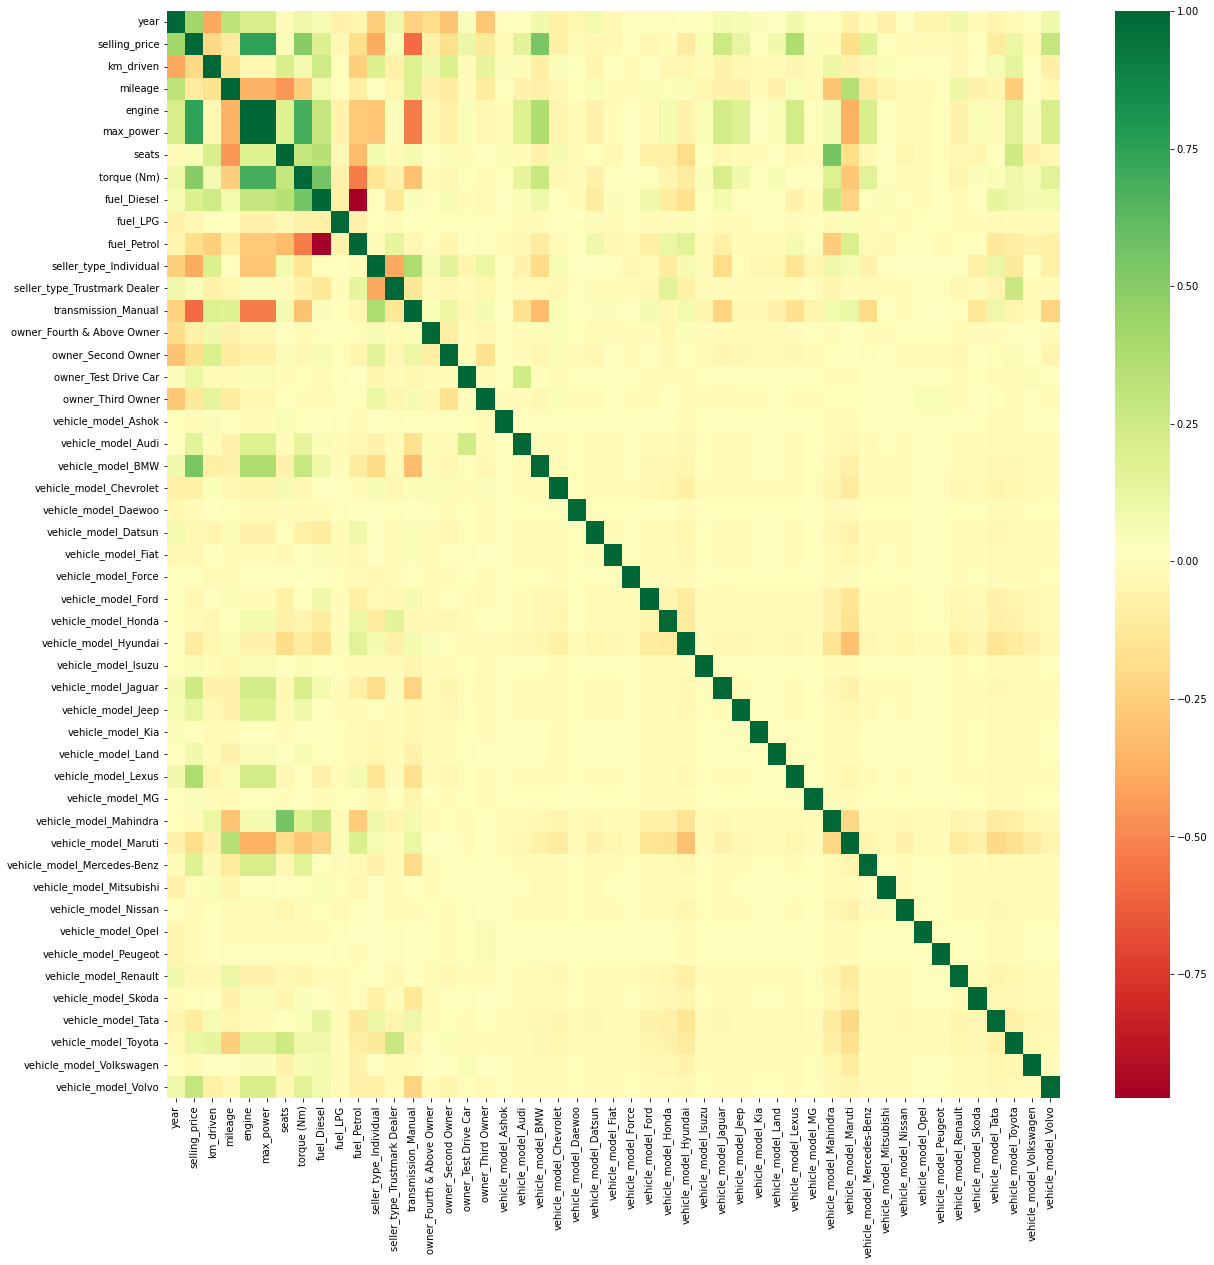

In [43]:
plt.figure(figsize=(20, 20))
sns.heatmap(df_train.corr(), cmap='RdYlGn')
plt.show()

In [44]:
corr_cols = ['year', 'engine', 'max_power', 'torque (Nm)']

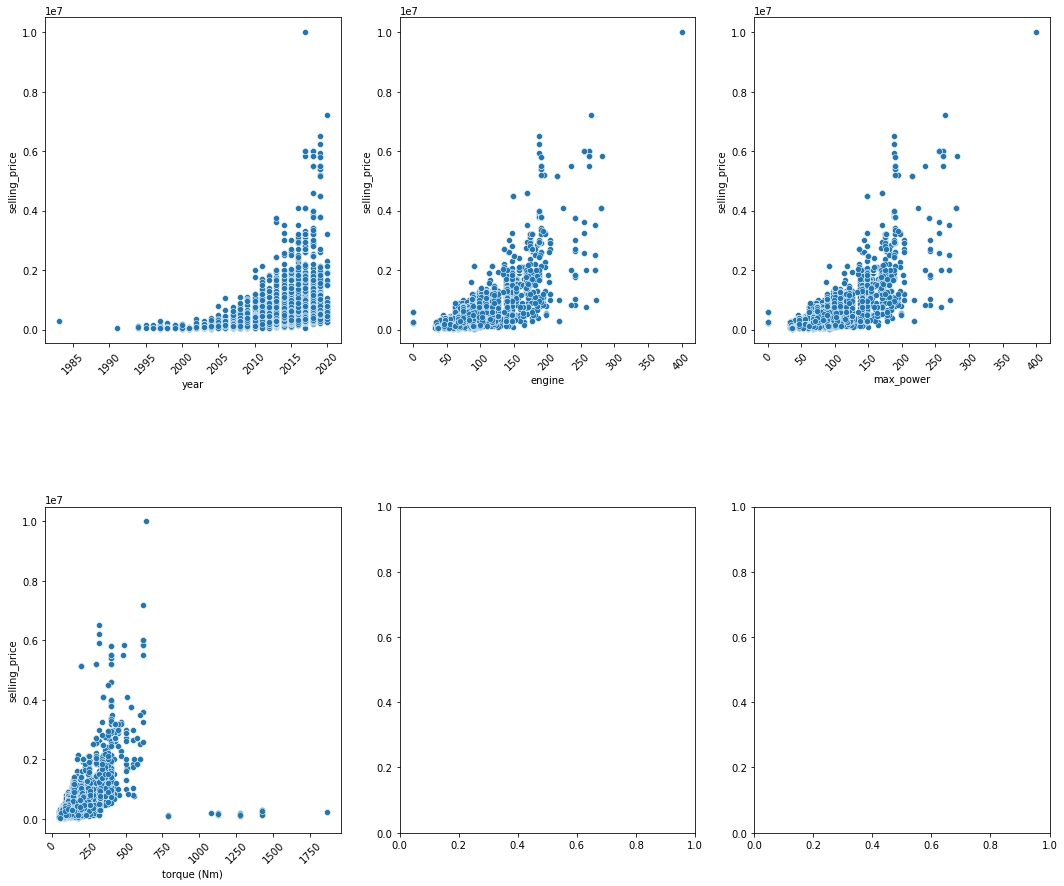

In [45]:
fig,axes = plt.subplots(2,3,figsize=(18,15))
for seg,corr_cols in enumerate(corr_cols):
    x,y = seg//3,seg%3
    an=sns.scatterplot(x=corr_cols, y='selling_price' ,data=df_mod, ax=axes[x,y])
    plt.setp(an.get_xticklabels(), rotation=45)
   
plt.subplots_adjust(hspace=0.5)

In [46]:
y_train = df_train.pop('selling_price')
X_train = df_train

# Building Linear Model

In [47]:
X_train_1 = X_train['max_power']

In [48]:
X_train_1c = sm.add_constant(X_train_1)

lr_1 = sm.OLS(y_train, X_train_1c).fit()

In [49]:
lr_1.params

const       -3.432178e-17
max_power    7.470096e-01
dtype: float64

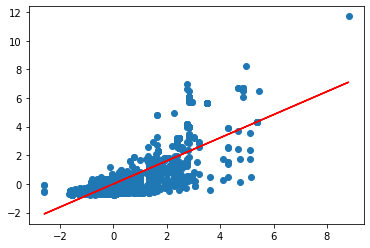

In [50]:
plt.scatter(X_train_1c.iloc[:, 1], y_train)
plt.plot(X_train_1c.iloc[:, 1], 0.8062*X_train_1c.iloc[:, 1], 'r')
plt.show()

In [51]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                     7179.
Date:                Mon, 24 Oct 2022   Prob (F-statistic):               0.00
Time:                        19:59:37   Log-Likelihood:                -5748.8
No. Observations:                5688   AIC:                         1.150e+04
Df Residuals:                    5686   BIC:                         1.151e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.432e-17      0.009  -3.89e-15      1.0

In [52]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=20)
rfe = rfe.fit(X_train, y_train)

In [53]:
list(zip(X_train.columns,rfe.support_, rfe.ranking_))

[('year', True, 1),
 ('km_driven', False, 24),
 ('mileage', False, 29),
 ('engine', True, 1),
 ('max_power', True, 1),
 ('seats', False, 27),
 ('torque (Nm)', False, 26),
 ('fuel_Diesel', False, 9),
 ('fuel_LPG', False, 7),
 ('fuel_Petrol', False, 12),
 ('seller_type_Individual', False, 6),
 ('seller_type_Trustmark Dealer', False, 5),
 ('transmission_Manual', False, 4),
 ('owner_Fourth & Above Owner', False, 25),
 ('owner_Second Owner', False, 13),
 ('owner_Test Drive Car', True, 1),
 ('owner_Third Owner', False, 23),
 ('vehicle_model_Ashok', False, 18),
 ('vehicle_model_Audi', True, 1),
 ('vehicle_model_BMW', True, 1),
 ('vehicle_model_Chevrolet', False, 11),
 ('vehicle_model_Daewoo', True, 1),
 ('vehicle_model_Datsun', True, 1),
 ('vehicle_model_Fiat', False, 10),
 ('vehicle_model_Force', True, 1),
 ('vehicle_model_Ford', False, 20),
 ('vehicle_model_Honda', False, 19),
 ('vehicle_model_Hyundai', False, 21),
 ('vehicle_model_Isuzu', False, 28),
 ('vehicle_model_Jaguar', True, 1),
 ('

In [54]:
col_sup = X_train.columns[rfe.support_]
col_sup

Index(['year', 'engine', 'max_power', 'owner_Test Drive Car',
       'vehicle_model_Audi', 'vehicle_model_BMW', 'vehicle_model_Daewoo',
       'vehicle_model_Datsun', 'vehicle_model_Force', 'vehicle_model_Jaguar',
       'vehicle_model_Jeep', 'vehicle_model_Kia', 'vehicle_model_Land',
       'vehicle_model_Lexus', 'vehicle_model_Mercedes-Benz',
       'vehicle_model_Mitsubishi', 'vehicle_model_Opel',
       'vehicle_model_Peugeot', 'vehicle_model_Toyota', 'vehicle_model_Volvo'],
      dtype='object')

In [55]:
X_train_rfe = X_train[col_sup]

In [56]:
X_train_rfec = sm.add_constant(X_train_rfe)
lm_rfe = sm.OLS(y_train, X_train_rfec).fit()

print(lm_rfe.summary())

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     1540.
Date:                Mon, 24 Oct 2022   Prob (F-statistic):               0.00
Time:                        19:59:37   Log-Likelihood:                -2899.3
No. Observations:                5688   AIC:                             5839.
Df Residuals:                    5668   BIC:                             5972.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [85]:
X_train_rfe.shape[1]

15

In [57]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
2,max_power,inf
1,engine,inf
5,vehicle_model_BMW,1.24
4,vehicle_model_Audi,1.12
0,year,1.09
9,vehicle_model_Jaguar,1.09
14,vehicle_model_Mercedes-Benz,1.09
13,vehicle_model_Lexus,1.09
19,vehicle_model_Volvo,1.08
3,owner_Test Drive Car,1.06


In [58]:
X_train_rfe1 = X_train_rfe.drop('max_power', 1)

X_train_rfe1c = sm.add_constant(X_train_rfe1)
lm_rfe1 = sm.OLS(y_train, X_train_rfe1c).fit()

print(lm_rfe1.summary())

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     1540.
Date:                Mon, 24 Oct 2022   Prob (F-statistic):               0.00
Time:                        19:59:37   Log-Likelihood:                -2899.3
No. Observations:                5688   AIC:                             5839.
Df Residuals:                    5668   BIC:                             5972.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [59]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
1,engine,1.82
4,vehicle_model_BMW,1.24
3,vehicle_model_Audi,1.12
0,year,1.09
8,vehicle_model_Jaguar,1.09
13,vehicle_model_Mercedes-Benz,1.09
12,vehicle_model_Lexus,1.09
18,vehicle_model_Volvo,1.08
2,owner_Test Drive Car,1.06
9,vehicle_model_Jeep,1.06


In [60]:
y_train_price = lm_rfe1.predict(X_train_rfe1c)

Text(0.5, 0, 'Errors')

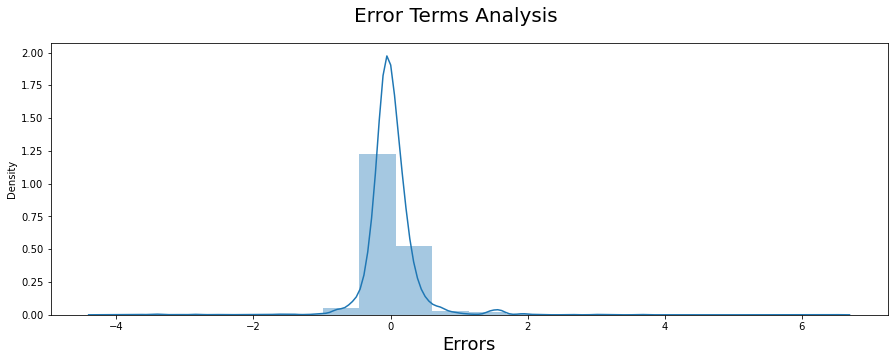

In [61]:
fig = plt.figure(figsize=(15,5))
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms Analysis', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18)

# Predictions

In [62]:
df_test[scaler_cols] - scaler.transform(df_test[scaler_cols])
df_test.shape

(2439, 49)

In [63]:
y_test = df_test.pop('selling_price')
X_test = df_test

In [64]:
X_test_1 = sm.add_constant(X_test)

X_test_new = X_test_1[X_train_rfe1c.columns]

In [65]:
y_pred = lm_rfe1.predict(X_test_new)

Text(0, 0.5, 'y_pred')

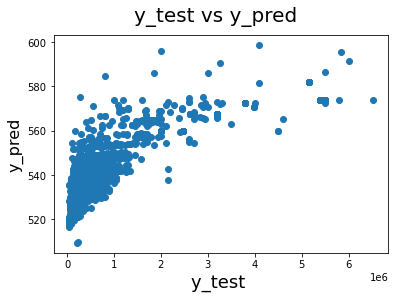

In [66]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)   
plt.xlabel('y_test ', fontsize=18)                       
plt.ylabel('y_pred', fontsize=16) 

In [67]:
r2_score(y_test, y_pred)

-0.638973243286894

# EXTRA TESTS WITH HELP FROM GOOGLE

In [68]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [69]:
list(zip(X_train.columns,rfe.support_, rfe.ranking_))

[('year', False, 3),
 ('km_driven', False, 29),
 ('mileage', False, 34),
 ('engine', True, 1),
 ('max_power', False, 6),
 ('seats', False, 32),
 ('torque (Nm)', False, 31),
 ('fuel_Diesel', False, 14),
 ('fuel_LPG', False, 12),
 ('fuel_Petrol', False, 17),
 ('seller_type_Individual', False, 11),
 ('seller_type_Trustmark Dealer', False, 10),
 ('transmission_Manual', False, 9),
 ('owner_Fourth & Above Owner', False, 30),
 ('owner_Second Owner', False, 18),
 ('owner_Test Drive Car', True, 1),
 ('owner_Third Owner', False, 28),
 ('vehicle_model_Ashok', False, 23),
 ('vehicle_model_Audi', True, 1),
 ('vehicle_model_BMW', True, 1),
 ('vehicle_model_Chevrolet', False, 16),
 ('vehicle_model_Daewoo', True, 1),
 ('vehicle_model_Datsun', False, 4),
 ('vehicle_model_Fiat', False, 15),
 ('vehicle_model_Force', False, 5),
 ('vehicle_model_Ford', False, 25),
 ('vehicle_model_Honda', False, 24),
 ('vehicle_model_Hyundai', False, 26),
 ('vehicle_model_Isuzu', False, 33),
 ('vehicle_model_Jaguar', True,

In [70]:
col_sup = X_train.columns[rfe.support_]
col_sup

Index(['engine', 'owner_Test Drive Car', 'vehicle_model_Audi',
       'vehicle_model_BMW', 'vehicle_model_Daewoo', 'vehicle_model_Jaguar',
       'vehicle_model_Jeep', 'vehicle_model_Kia', 'vehicle_model_Land',
       'vehicle_model_Lexus', 'vehicle_model_Mercedes-Benz',
       'vehicle_model_Opel', 'vehicle_model_Peugeot', 'vehicle_model_Toyota',
       'vehicle_model_Volvo'],
      dtype='object')

In [71]:
X_train_rfe = X_train[col_sup]

In [72]:
X_train_rfec = sm.add_constant(X_train_rfe)
lm_rfe = sm.OLS(y_train, X_train_rfec).fit()

print(lm_rfe.summary())

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     1330.
Date:                Mon, 24 Oct 2022   Prob (F-statistic):               0.00
Time:                        19:59:38   Log-Likelihood:                -3782.9
No. Observations:                5688   AIC:                             7598.
Df Residuals:                    5672   BIC:                             7704.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [73]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
0,engine,1.75
3,vehicle_model_BMW,1.24
2,vehicle_model_Audi,1.12
5,vehicle_model_Jaguar,1.09
9,vehicle_model_Lexus,1.09
10,vehicle_model_Mercedes-Benz,1.08
14,vehicle_model_Volvo,1.08
1,owner_Test Drive Car,1.06
6,vehicle_model_Jeep,1.06
13,vehicle_model_Toyota,1.05


In [74]:
X_train_rfe1 = X_train_rfe.drop('vehicle_model_Daewoo', 1)

X_train_rfe1c = sm.add_constant(X_train_rfe1)
lm_rfe1 = sm.OLS(y_train, X_train_rfe1c).fit()

print(lm_rfe1.summary())

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     1425.
Date:                Mon, 24 Oct 2022   Prob (F-statistic):               0.00
Time:                        19:59:38   Log-Likelihood:                -3783.0
No. Observations:                5688   AIC:                             7596.
Df Residuals:                    5673   BIC:                             7696.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [75]:
df = df_mod.copy()

In [76]:
m=[]
for i in df.columns.values:
    m.append(i.replace(' ','_'))
    
df.columns = m
X = df.drop([target],axis=1)
Y = df[target]
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=100)
Train_X.reset_index(drop=True,inplace=True)

print('Original set  ---> ',X.shape,Y.shape,'\nTraining set  ---> ',Train_X.shape,Train_Y.shape,'\nTesting set   ---> ', Test_X.shape,'', Test_Y.shape)

Original set  --->  (8127, 48) (8127,) 
Training set  --->  (6501, 48) (6501,) 
Testing set   --->  (1626, 48)  (1626,)


In [77]:
std = preprocessing.StandardScaler()

print('\033[1mStandardardization on Training set'.center(120))
Train_X_std = std.fit_transform(Train_X)
Train_X_std = pd.DataFrame(Train_X_std, columns=X.columns)
display(Train_X_std.describe())

print('\n','\033[1mStandardardization on Testing set'.center(120))
Test_X_std = std.transform(Test_X)
Test_X_std = pd.DataFrame(Test_X_std, columns=X.columns)
display(Test_X_std.describe())

                                         Standardardization on Training set                                         


,year,km_driven,mileage,engine,max_power,seats,torque_(Nm),fuel_Diesel,fuel_LPG,fuel_Petrol,...,vehicle_model_Mitsubishi,vehicle_model_Nissan,vehicle_model_Opel,vehicle_model_Peugeot,vehicle_model_Renault,vehicle_model_Skoda,vehicle_model_Tata,vehicle_model_Toyota,vehicle_model_Volkswagen,vehicle_model_Volvo
count,6.501000e+03,6.501000e+03,6.501000e+03,6.501000e+03,6.501000e+03,6.501000e+03,6.501000e+03,6.501000e+03,6.501000e+03,6.501000e+03,...,6.501000e+03,6.501000e+03,6.501000e+03,6.501000e+03,6.501000e+03,6.501000e+03,6.501000e+03,6.501000e+03,6.501000e+03,6.501000e+03
mean,2.614483e-14,-1.270327e-16,-7.152835e-16,-2.992146e-16,-2.992146e-16,4.806185e-16,-4.358236e-17,-1.821169e-16,2.258914e-16,-8.720058e-16,...,1.999134e-15,7.669949e-16,1.480237e-15,6.790867e-16,2.326755e-16,4.742015e-16,-2.121224e-16,-3.176457e-17,1.319254e-17,-1.933758e-15
std,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,...,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00
min,-4.912050e+00,-1.170304e+00,-4.905355e+00,-2.589365e+00,-2.589365e+00,-3.620292e+00,-1.241804e+00,-1.081281e+00,-6.921954e-02,-9.032839e-01,...,-4.116935e-02,-1.004960e-01,-1.240347e-02,-1.240347e-02,-1.735113e-01,-1.184836e-01,-3.109018e-01,-2.515896e-01,-1.499712e-01,-9.152043e-02
25%,-6.965066e-01,-5.924156e-01,-6.667116e-01,-6.593719e-01,-6.593719e-01,-4.366907e-01,-6.350492e-01,-1.081281e+00,-6.921954e-02,-9.032839e-01,...,-4.116935e-02,-1.004960e-01,-1.240347e-02,-1.240347e-02,-1.735113e-01,-1.184836e-01,-3.109018e-01,-2.515896e-01,-1.499712e-01,-9.152043e-02
50%,2.953859e-01,-1.674977e-01,-5.720152e-03,-2.325330e-01,-2.325330e-01,-4.366907e-01,-2.268492e-02,9.248288e-01,-6.921954e-02,-9.032839e-01,...,-4.116935e-02,-1.004960e-01,-1.240347e-02,-1.240347e-02,-1.735113e-01,-1.184836e-01,-3.109018e-01,-2.515896e-01,-1.499712e-01,-9.152043e-02
75%,7.913322e-01,4.783774e-01,7.209396e-01,2.637914e-01,2.637914e-01,-4.366907e-01,2.344146e-01,9.248288e-01,-6.921954e-02,1.107072e+00,...,-4.116935e-02,-1.004960e-01,-1.240347e-02,-1.240347e-02,-1.735113e-01,-1.184836e-01,-3.109018e-01,-2.515896e-01,-1.499712e-01,-9.152043e-02
max,1.535252e+00,3.893271e+01,5.691254e+00,8.755192e+00,8.755192e+00,4.869311e+00,1.573798e+01,9.248288e-01,1.444679e+01,1.107072e+00,...,2.428992e+01,9.950647e+00,8.062258e+01,8.062258e+01,5.763314e+00,8.439984e+00,3.216450e+00,3.974726e+00,6.667949e+00,1.092652e+01



                                          Standardardization on Testing set                                          


,year,km_driven,mileage,engine,max_power,seats,torque_(Nm),fuel_Diesel,fuel_LPG,fuel_Petrol,...,vehicle_model_Mitsubishi,vehicle_model_Nissan,vehicle_model_Opel,vehicle_model_Peugeot,vehicle_model_Renault,vehicle_model_Skoda,vehicle_model_Tata,vehicle_model_Toyota,vehicle_model_Volkswagen,vehicle_model_Volvo
count,1626.000000,1626.000000,1626.000000,1626.000000,1626.000000,1626.000000,1626.000000,1626.000000,1626.000000,1626.000000,...,1626.000000,1626.000000,1.626000e+03,1.626000e+03,1626.000000,1626.000000,1626.000000,1626.000000,1626.000000,1626.000000
mean,-0.003829,-0.003306,-0.028590,0.031043,0.031043,0.025917,0.031629,0.026644,-0.006728,-0.025453,...,0.003722,-0.001592,-1.240347e-02,-1.240347e-02,-0.034766,-0.039531,0.038362,0.010931,0.030331,-0.003430
std,1.010985,0.787162,1.021526,1.011788,1.011788,1.019458,1.036258,0.997865,0.950676,0.997385,...,1.044466,0.992434,5.205771e-17,5.205771e-17,0.897190,0.818469,1.053886,1.020400,1.094308,0.981536
min,-7.639755,-1.187284,-4.905355,-2.589365,-2.589365,-3.620292,-1.233390,-1.081281,-0.069220,-0.903284,...,-0.041169,-0.100496,-1.240347e-02,-1.240347e-02,-0.173511,-0.118484,-0.310902,-0.251590,-0.149971,-0.091520
25%,-0.696507,-0.592416,-0.666712,-0.632145,-0.632145,-0.436691,-0.625700,-1.081281,-0.069220,-0.903284,...,-0.041169,-0.100496,-1.240347e-02,-1.240347e-02,-0.173511,-0.118484,-0.310902,-0.251590,-0.149971,-0.091520
50%,0.295386,-0.167498,-0.010731,-0.212680,-0.212680,-0.436691,0.004427,0.924829,-0.069220,-0.903284,...,-0.041169,-0.100496,-1.240347e-02,-1.240347e-02,-0.173511,-0.118484,-0.310902,-0.251590,-0.149971,-0.091520
75%,0.791332,0.450758,0.662911,0.303497,0.303497,-0.436691,0.271811,0.924829,-0.069220,1.107072,...,-0.041169,-0.100496,-1.240347e-02,-1.240347e-02,-0.173511,-0.118484,-0.310902,-0.251590,-0.149971,-0.091520
max,1.535252,5.210466,3.531564,5.351825,5.351825,9.114112,11.612237,0.924829,14.446788,1.107072,...,24.289916,9.950647,-1.240347e-02,-1.240347e-02,5.763314,8.439984,3.216450,3.974726,6.667949,10.926522


                                       Correlation Matrix                                       


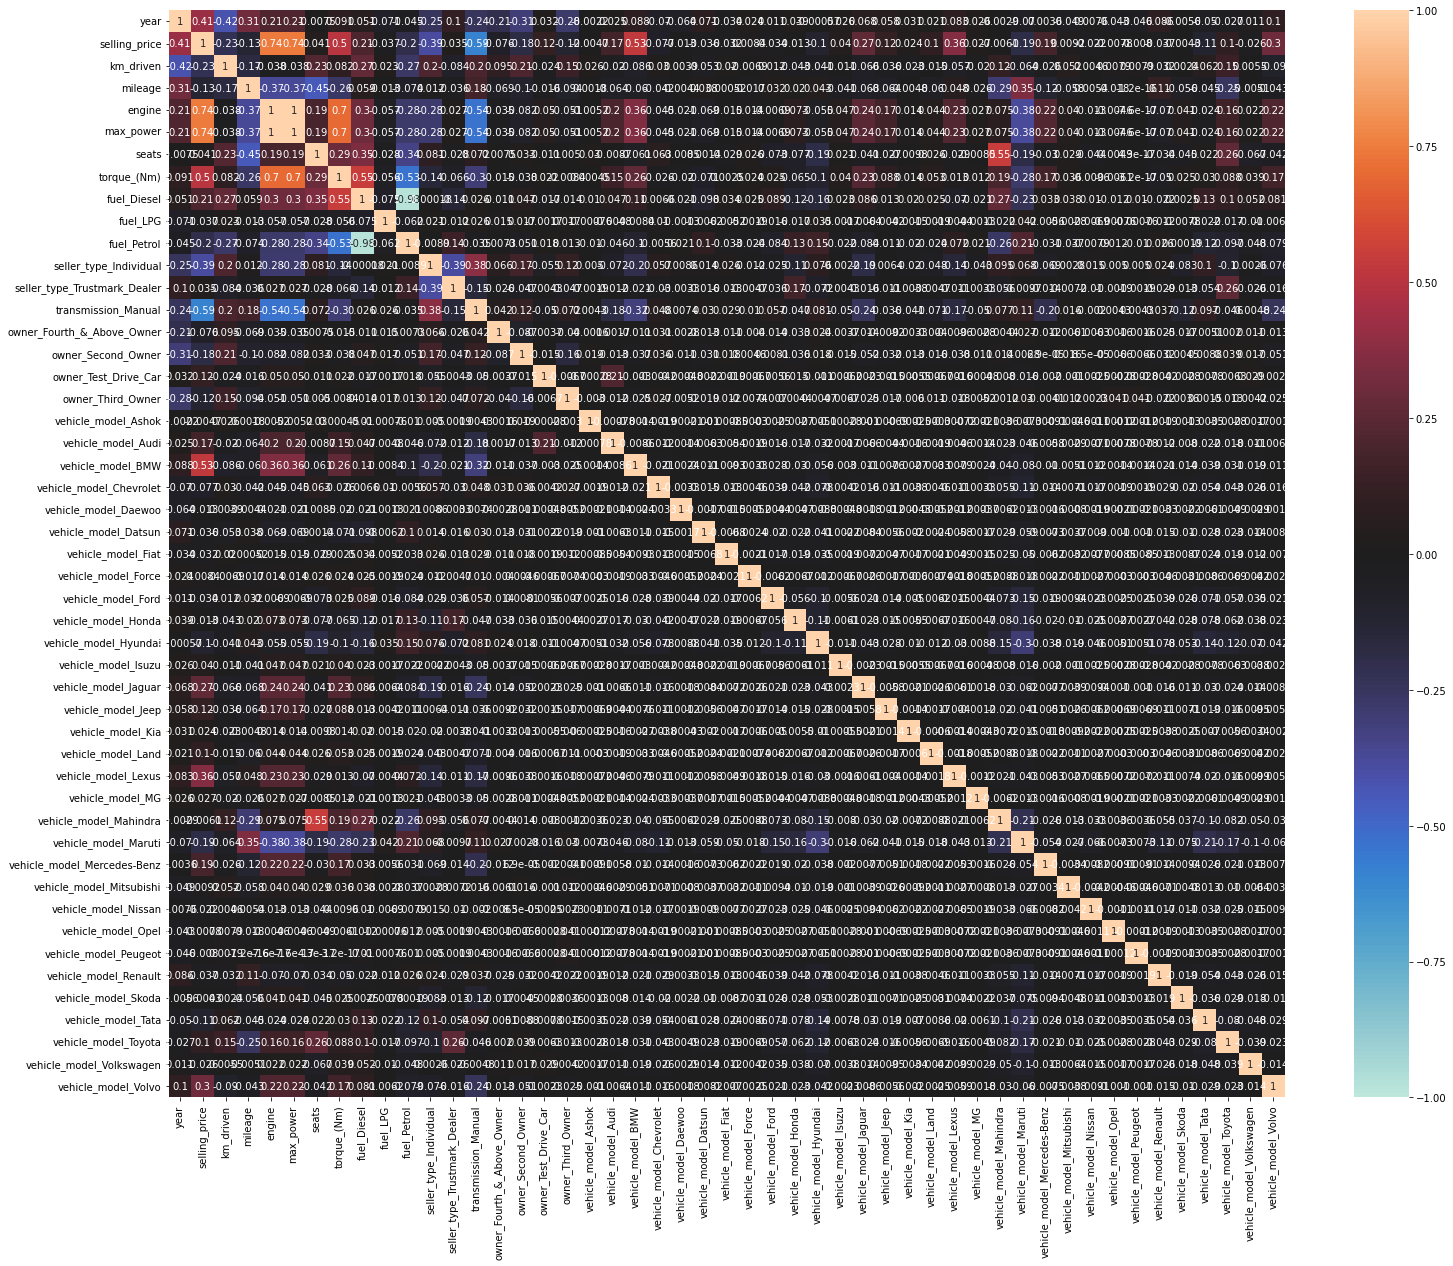

In [78]:
print('\033[1mCorrelation Matrix'.center(100))
plt.figure(figsize=[25,20])
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, center=0) #cmap='BuGn'
plt.show()

# MANUAL METHOD VIF

Dropped Features -->  ['engine', 'vehicle_model_Maruti', 'fuel_Diesel', 'max_power', 'mileage', 'torque_(Nm)', 'seats', 'transmission_Manual', 'year', 'seller_type_Individual', 'fuel_Petrol', 'vehicle_model_Hyundai', 'km_driven', 'vehicle_model_Toyota', 'vehicle_model_Audi', 'vehicle_model_Mahindra', 'owner_Second_Owner', 'vehicle_model_Honda', 'vehicle_model_Tata', 'vehicle_model_Renault', 'owner_Fourth_&_Above_Owner', 'vehicle_model_Volkswagen', 'owner_Third_Owner', 'vehicle_model_Chevrolet', 'vehicle_model_Ford']


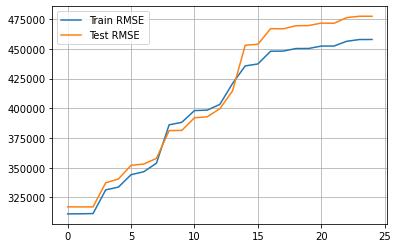

In [79]:
from sklearn.preprocessing import PolynomialFeatures
Trr=[]; Tss=[]; n=3
order=['ord-'+str(i) for i in range(2,n)]

DROP=[];b=[]

for i in range(len(Train_X_std.columns)):
    vif = pd.DataFrame()
    X = Train_X_std.drop(DROP,axis=1)
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    vif.reset_index(drop=True, inplace=True)
    if vif.loc[0][1]>1:
        DROP.append(vif.loc[0][0])
        LR = LinearRegression()
        LR.fit(Train_X_std.drop(DROP,axis=1), Train_Y)

        pred1 = LR.predict(Train_X_std.drop(DROP,axis=1))
        pred2 = LR.predict(Test_X_std.drop(DROP,axis=1))
        
        Trr.append(np.sqrt(mean_squared_error(Train_Y, pred1)))
        Tss.append(np.sqrt(mean_squared_error(Test_Y, pred2)))

        
print('Dropped Features --> ',DROP)

plt.plot(Trr, label='Train RMSE')
plt.plot(Tss, label='Test RMSE')
plt.legend()
plt.grid()
plt.show()

# AUTOMATIC METHOD RFE

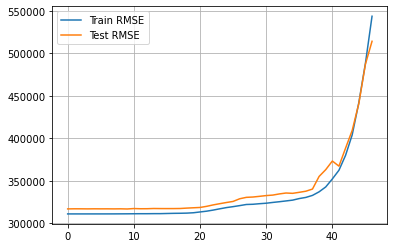

In [80]:
from sklearn.preprocessing import PolynomialFeatures
Trr=[]; Tss=[]; n=3
order=['ord-'+str(i) for i in range(2,n)]
Trd = pd.DataFrame(np.zeros((10,n-2)), columns=order)
Tsd = pd.DataFrame(np.zeros((10,n-2)), columns=order)

m=df.shape[1]-2
for i in range(m):
    lm = LinearRegression()
    rfe = RFE(lm,n_features_to_select=Train_X_std.shape[1]-i)             # running RFE
    rfe = rfe.fit(Train_X_std, Train_Y)

    LR = LinearRegression()
    LR.fit(Train_X_std.loc[:,rfe.support_], Train_Y)

    pred1 = LR.predict(Train_X_std.loc[:,rfe.support_])
    pred2 = LR.predict(Test_X_std.loc[:,rfe.support_])

    Trr.append(np.sqrt(mean_squared_error(Train_Y, pred1)))
    Tss.append(np.sqrt(mean_squared_error(Test_Y, pred2)))

plt.plot(Trr, label='Train RMSE')
plt.plot(Tss, label='Test RMSE')
plt.legend()
plt.grid()
plt.show()

# REMOVING PREPROCESSING

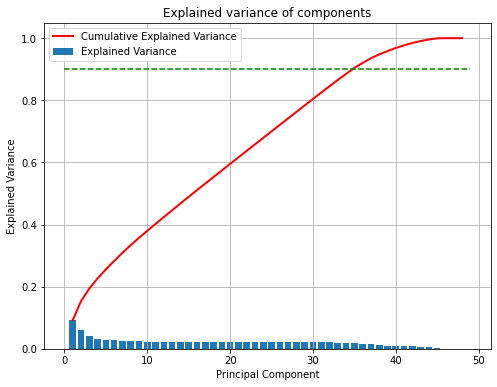

In [81]:
from sklearn.decomposition import PCA

pca = PCA().fit(Train_X_std)

fig, ax = plt.subplots(figsize=(8,6))
x_values = range(1, pca.n_components_+1)
ax.bar(x_values, pca.explained_variance_ratio_, lw=2, label='Explained Variance')
ax.plot(x_values, np.cumsum(pca.explained_variance_ratio_), lw=2, label='Cumulative Explained Variance', color='red')
plt.plot([0,pca.n_components_+1],[0.9,0.9],'g--')
ax.set_title('Explained variance of components')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Explained Variance')
plt.legend()
plt.grid()
plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
Trr=[]; Tss=[]; n=3
order=['ord-'+str(i) for i in range(2,n)]

DROP=[];b=[]

for i in range(len(Train_X_std.columns)):
    vif = pd.DataFrame()
    X = Train_X_std.drop(DROP,axis=1)
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    vif.reset_index(drop=True, inplace=True)
    if vif.loc[0][1]>1:
        DROP.append(vif.loc[0][0])
        LR = LinearRegression()
        LR.fit(Train_X_std.drop(DROP,axis=1), Train_Y)

        pred1 = LR.predict(Train_X_std.drop(DROP,axis=1))
        pred2 = LR.predict(Test_X_std.drop(DROP,axis=1))
        
        Trr.append(np.sqrt(mean_squared_error(Train_Y, pred1)))
        Tss.append(np.sqrt(mean_squared_error(Test_Y, pred2)))

        
print('Dropped Features --> ',DROP)

plt.plot(Trr, label='Train RMSE')
plt.plot(Tss, label='Test RMSE')
plt.legend()
plt.grid()
plt.show()

In [86]:
Model_Evaluation_Comparison_Matrix = pd.DataFrame(np.zeros([5,8]), columns=['Train-R2','Test-R2','Train-RSS','Test-RSS',
                                                                            'Train-MSE','Test-MSE','Train-RMSE','Test-RMSE'])
rc=np.random.choice(Train_X_std.loc[:,Train_X_std.nunique()>=50].columns.values,2,replace=False)
def Evaluate(n, pred1,pred2):
    #Plotting predicted predicteds alongside the actual datapoints 
    plt.figure(figsize=[15,6])
    for e,i in enumerate(rc):
        plt.subplot(2,3,e+1)
        plt.scatter(y=Train_Y, x=Train_X_std[i], label='Actual')
        plt.scatter(y=pred1, x=Train_X_std[i], label='Prediction')
        plt.legend()
    plt.show()

    #Evaluating the Multiple Linear Regression Model

    print('\n\n{}Training Set Metrics{}'.format('-'*20, '-'*20))
    print('\nR2-Score on Training set --->',round(r2_score(Train_Y, pred1),20))
    print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(Train_Y-pred1)),20))
    print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(Train_Y, pred1),20))
    print('Root Mean Squared Error (RMSE) on Training set --->',round(np.sqrt(mean_squared_error(Train_Y, pred1)),20))

    print('\n{}Testing Set Metrics{}'.format('-'*20, '-'*20))
    print('\nR2-Score on Testing set --->',round(r2_score(Test_Y, pred2),20))
    print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(Test_Y-pred2)),20))
    print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(Test_Y, pred2),20))
    print('Root Mean Squared Error (RMSE) on Training set --->',round(np.sqrt(mean_squared_error(Test_Y, pred2)),20))
    print('\n{}Residual Plots{}'.format('-'*20, '-'*20))
    
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-R2']  = round(r2_score(Train_Y, pred1),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-R2']   = round(r2_score(Test_Y, pred2),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-RSS'] = round(np.sum(np.square(Train_Y-pred1)),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-RSS']  = round(np.sum(np.square(Test_Y-pred2)),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-MSE'] = round(mean_squared_error(Train_Y, pred1),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-MSE']  = round(mean_squared_error(Test_Y, pred2),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-RMSE']= round(np.sqrt(mean_squared_error(Train_Y, pred1)),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-RMSE'] = round(np.sqrt(mean_squared_error(Test_Y, pred2)),20)

    # Plotting y_test and y_pred to understand the spread.
    plt.figure(figsize=[15,4])

    plt.subplot(1,2,1)
    sns.distplot((Train_Y - pred1))
    plt.title('Error Terms')          
    plt.xlabel('Errors') 

    plt.subplot(1,2,2)
    plt.scatter(Train_Y,pred1)
    plt.plot([Train_Y.min(),Train_Y.max()],[Train_Y.min(),Train_Y.max()], 'r--')
    plt.title('Test vs Prediction')         
    plt.xlabel('y_test')                       
    plt.ylabel('y_pred')                       
    plt.show()

<<<----------------------------------- Evaluating Multiple Linear Regression Model ----------------------------------->>>

The Coeffecient of the Regresion Model was found to be  [ 1.72764827e+05 -3.16009312e+04 -1.24751369e+04 -4.99014854e+17
  4.99014854e+17  7.48839149e+03  1.20762005e+04  6.16386279e+04
  9.22229426e+03  1.75612258e+04 -2.32062399e+04 -1.18716560e+04
 -3.77853198e+04 -3.54150228e+03 -2.61348367e+04  7.40237207e+04
 -1.15389783e+04 -5.66106754e+03  2.74193776e+04  2.71767713e+05
 -8.93163436e+04 -5.00769940e+01 -5.18335109e+04 -3.87496394e+04
 -8.06000196e+03 -1.00392483e+05 -1.09186472e+05 -1.74382278e+05
  3.34157783e+02  8.78809417e+04  1.79510891e+04 -1.62991384e+03
  4.70773098e+04  1.97509683e+05  1.99842494e+03 -1.29415481e+05
 -1.75106795e+05  5.38523903e+04 -1.07177041e+04 -4.86590668e+04
 -2.97454589e+02 -2.07272833e+03 -8.11489912e+04 -5.67711167e+04
 -1.59670251e+05 -3.78192730e+04 -8.31704079e+04  1.20958976e+05]
The Intercept of the Regresion Model was

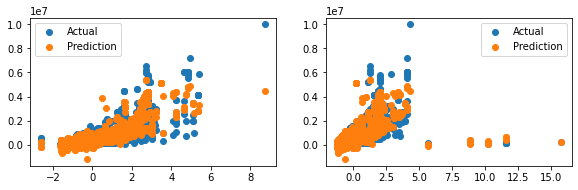



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.8548053684471366
Residual Sum of Squares (RSS) on Training set  ---> 629542058741584.5
Mean Squared Error (MSE) on Training set       ---> 96837726310.04222
Root Mean Squared Error (RMSE) on Training set ---> 311187.60629247787

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.8273265309475286
Residual Sum of Squares (RSS) on Training set  ---> 163478215947453.16
Mean Squared Error (MSE) on Training set       ---> 100540108208.76578
Root Mean Squared Error (RMSE) on Training set ---> 317080.60206951445

--------------------Residual Plots--------------------


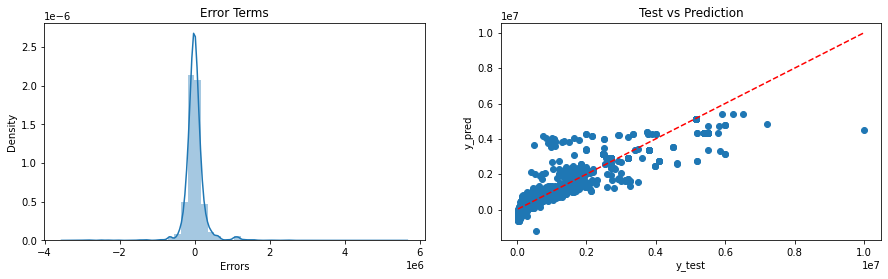

In [88]:
MLR = LinearRegression().fit(Train_X_std,Train_Y)
pred1 = MLR.predict(Train_X_std)
pred2 = MLR.predict(Test_X_std)

print('{}{}\033[1m Evaluating Multiple Linear Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))

print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(0, pred1, pred2)

<<<----------------------------------- Evaluating Ridge Regression Model ----------------------------------->>>

The Intercept of the Regresion Model was found to be  638654.4690047641


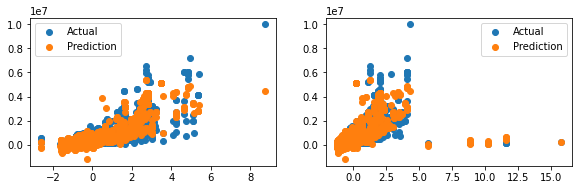



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.8548026229749265
Residual Sum of Squares (RSS) on Training set  ---> 629553962695669.0
Mean Squared Error (MSE) on Training set       ---> 96839557405.88663
Root Mean Squared Error (RMSE) on Training set ---> 311190.548387779

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.827307698465472
Residual Sum of Squares (RSS) on Training set  ---> 163496045557209.38
Mean Squared Error (MSE) on Training set       ---> 100551073528.41905
Root Mean Squared Error (RMSE) on Training set ---> 317097.89265843295

--------------------Residual Plots--------------------


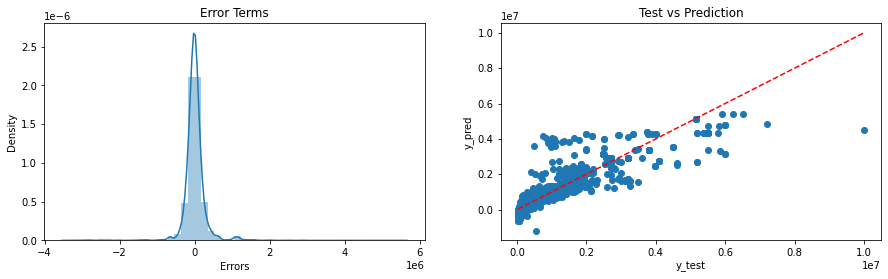

In [91]:
RLR = Ridge().fit(Train_X_std,Train_Y)
pred1 = RLR.predict(Train_X_std)
pred2 = RLR.predict(Test_X_std)

print('{}{}\033[1m Evaluating Ridge Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(1, pred1, pred2)

<<<----------------------------------- Evaluating Lasso Regression Model ----------------------------------->>>

The Intercept of the Regresion Model was found to be  638654.4690047641


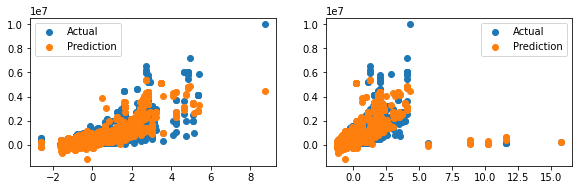



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.8547960752723036
Residual Sum of Squares (RSS) on Training set  ---> 629582352548277.2
Mean Squared Error (MSE) on Training set       ---> 96843924403.67285
Root Mean Squared Error (RMSE) on Training set ---> 311197.5649063997

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.8273138592542466
Residual Sum of Squares (RSS) on Training set  ---> 163490212844383.12
Mean Squared Error (MSE) on Training set       ---> 100547486374.15936
Root Mean Squared Error (RMSE) on Training set ---> 317092.2363826642

--------------------Residual Plots--------------------


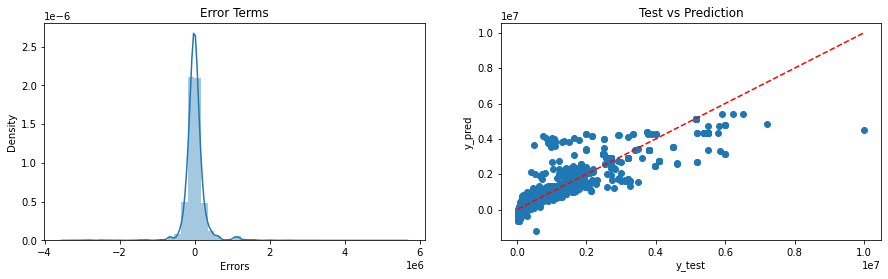

In [92]:
LLR = Lasso().fit(Train_X_std,Train_Y)
pred1 = LLR.predict(Train_X_std)
pred2 = LLR.predict(Test_X_std)

print('{}{}\033[1m Evaluating Lasso Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(2, pred1, pred2)

<<<----------------------------------- Evaluating Elastic-Net Regression Model ----------------------------------->>>

The Intercept of the Regresion Model was found to be  638654.4690047641


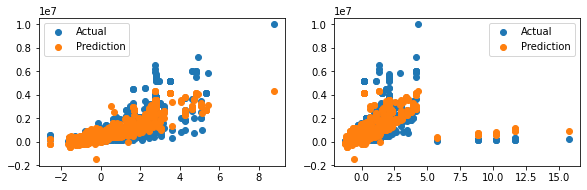



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.8183906677781883
Residual Sum of Squares (RSS) on Training set  ---> 787430717450303.8
Mean Squared Error (MSE) on Training set       ---> 121124552753.46925
Root Mean Squared Error (RMSE) on Training set ---> 348029.5285654211

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.8122975066557362
Residual Sum of Squares (RSS) on Training set  ---> 177706910674762.88
Mean Squared Error (MSE) on Training set       ---> 109290842973.4089
Root Mean Squared Error (RMSE) on Training set ---> 330591.6559343398

--------------------Residual Plots--------------------


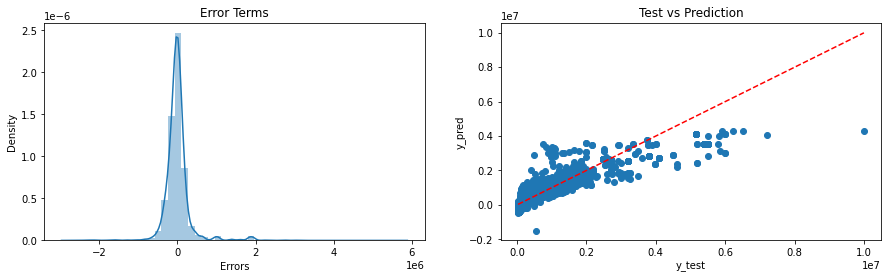

In [93]:
ENR = ElasticNet().fit(Train_X_std,Train_Y)
pred1 = ENR.predict(Train_X_std)
pred2 = ENR.predict(Test_X_std)

print('{}{}\033[1m Evaluating Elastic-Net Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(3, pred1, pred2)

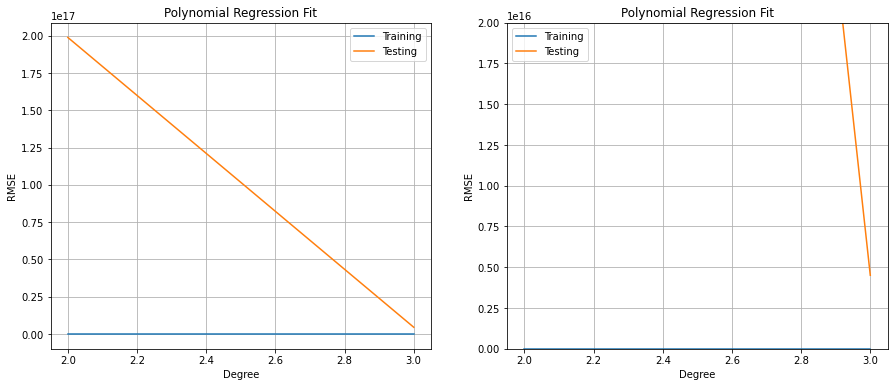

In [94]:
#Checking polynomial regression performance on various degrees

Trr=[]; Tss=[]
n_degree=4

for i in range(2,n_degree):
    #print(f'{i} Degree')
    poly_reg = PolynomialFeatures(degree=i)
    X_poly = poly_reg.fit_transform(Train_X_std)
    X_poly1 = poly_reg.fit_transform(Test_X_std)
    LR = LinearRegression()
    LR.fit(X_poly, Train_Y)
    
    pred1 = LR.predict(X_poly)
    Trr.append(np.sqrt(mean_squared_error(Train_Y, pred1)))
    
    pred2 = LR.predict(X_poly1)
    Tss.append(np.sqrt(mean_squared_error(Test_Y, pred2)))

plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
plt.plot(range(2,n_degree),Trr, label='Training')
plt.plot(range(2,n_degree),Tss, label='Testing')
#plt.plot([1,4],[1,4],'b--')
plt.title('Polynomial Regression Fit')
#plt.ylim([0,5])
plt.xlabel('Degree')
plt.ylabel('RMSE')
plt.grid()
plt.legend()
#plt.xticks()

plt.subplot(1,2,2)
plt.plot(range(2,n_degree),Trr, label='Training')
plt.plot(range(2,n_degree),Tss, label='Testing')
plt.title('Polynomial Regression Fit')
plt.ylim([0,2e16])
plt.xlabel('Degree')
plt.ylabel('RMSE')
plt.grid()
plt.legend()
#plt.xticks()
plt.show()

<<<----------------------------------- Evaluating Polynomial Regression Model ----------------------------------->>>

The Coeffecient of the Regresion Model was found to be  [ 1.72764827e+05 -3.16009312e+04 -1.24751369e+04 -4.99014854e+17
  4.99014854e+17  7.48839149e+03  1.20762005e+04  6.16386279e+04
  9.22229426e+03  1.75612258e+04 -2.32062399e+04 -1.18716560e+04
 -3.77853198e+04 -3.54150228e+03 -2.61348367e+04  7.40237207e+04
 -1.15389783e+04 -5.66106754e+03  2.74193776e+04  2.71767713e+05
 -8.93163436e+04 -5.00769940e+01 -5.18335109e+04 -3.87496394e+04
 -8.06000196e+03 -1.00392483e+05 -1.09186472e+05 -1.74382278e+05
  3.34157783e+02  8.78809417e+04  1.79510891e+04 -1.62991384e+03
  4.70773098e+04  1.97509683e+05  1.99842494e+03 -1.29415481e+05
 -1.75106795e+05  5.38523903e+04 -1.07177041e+04 -4.86590668e+04
 -2.97454589e+02 -2.07272833e+03 -8.11489912e+04 -5.67711167e+04
 -1.59670251e+05 -3.78192730e+04 -8.31704079e+04  1.20958976e+05]
The Intercept of the Regresion Model was foun

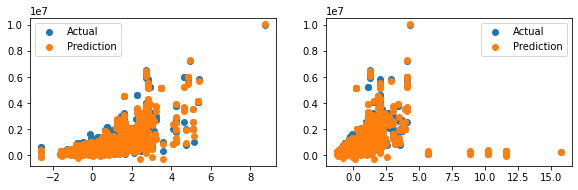



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.978068833187828
Residual Sum of Squares (RSS) on Training set  ---> 95090236862601.0
Mean Squared Error (MSE) on Training set       ---> 14627016899.338717
Root Mean Squared Error (RMSE) on Training set ---> 120942.20478947255

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> -6.792031714295119e+22
Residual Sum of Squares (RSS) on Training set  ---> 6.430340650503053e+37
Mean Squared Error (MSE) on Training set       ---> 3.9546990470498477e+34
Root Mean Squared Error (RMSE) on Training set ---> 1.988642513638348e+17

--------------------Residual Plots--------------------


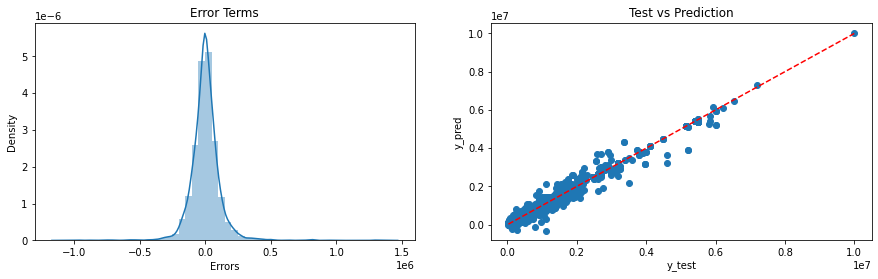

In [95]:
#Using the 2nd Order Polynomial Regression model (degree=2)

poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(Train_X_std)
X_poly1 = poly_reg.fit_transform(Test_X_std)
PR = LinearRegression()
PR.fit(X_poly, Train_Y)

pred1 = PR.predict(X_poly)
pred2 = PR.predict(X_poly1)

print('{}{}\033[1m Evaluating Polynomial Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(4, pred1, pred2)

In [96]:
# Regression Models Results Evaluation

EMC = Model_Evaluation_Comparison_Matrix.copy()
EMC.index = ['Multiple Linear Regression (MLR)','Ridge Linear Regression (RLR)','Lasso Linear Regression (LLR)','Elastic-Net Regression (ENR)','Polynomial Regression (PNR)']
EMC

,Train-R2,Test-R2,Train-RSS,Test-RSS,Train-MSE,Test-MSE,Train-RMSE,Test-RMSE
Multiple Linear Regression (MLR),0.854805,8.273265e-01,6.295421e+14,1.634782e+14,9.683773e+10,1.005401e+11,311187.606292,3.170806e+05
Ridge Linear Regression (RLR),0.854803,8.273077e-01,6.295540e+14,1.634960e+14,9.683956e+10,1.005511e+11,311190.548388,3.170979e+05
Lasso Linear Regression (LLR),0.854796,8.273139e-01,6.295824e+14,1.634902e+14,9.684392e+10,1.005475e+11,311197.564906,3.170922e+05
Elastic-Net Regression (ENR),0.818391,8.122975e-01,7.874307e+14,1.777069e+14,1.211246e+11,1.092908e+11,348029.528565,3.305917e+05
Polynomial Regression (PNR),0.978069,-6.792032e+22,9.509024e+13,6.430341e+37,1.462702e+10,3.954699e+34,120942.204789,1.988643e+17


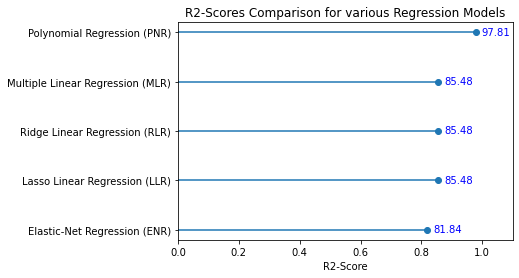

In [97]:
# R2-Scores Comparison for different Regression Models

R2 = round(EMC['Train-R2'].sort_values(ascending=True),4)
plt.hlines(y=R2.index, xmin=0, xmax=R2.values)
plt.plot(R2.values, R2.index,'o')
plt.title('R2-Scores Comparison for various Regression Models')
plt.xlabel('R2-Score')
#plt.ylabel('Regression Models')
for i, v in enumerate(R2):
    plt.text(v+0.02, i-0.05, str(v*100), color='blue')
plt.xlim([0,1.1])
plt.show()

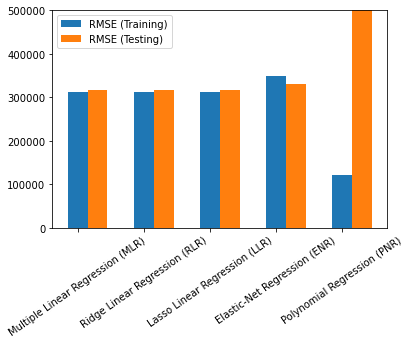

In [98]:
# Root Mean SquaredError Comparison for different Regression Models

cc = Model_Evaluation_Comparison_Matrix.columns.values
s=5

plt.bar(np.arange(5), Model_Evaluation_Comparison_Matrix[cc[6]].values, width=0.3, label='RMSE (Training)')
plt.bar(np.arange(5)+0.3, Model_Evaluation_Comparison_Matrix[cc[7]].values, width=0.3, label='RMSE (Testing)')
plt.xticks(np.arange(5),EMC.index, rotation =35)
plt.legend()
plt.ylim([0,500000])
plt.show()